In [2]:
import os
import cdsapi 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.io import shapereader
import pandas as pd
import glob
import sys

import geopandas as gpd

# creds
sys.path.append('/Users/max/Deep_Sky/GitHub/UNSEEN-open-Deep-Sky')
sys.path.append('/Users/max/Deep_Sky')
from creds import CDS_UID, CDS_API_key

In [2]:
import src.cdsretrieve as retrieve
import src.preprocess as preprocess

c = cdsapi.Client()

In [3]:
continental_us = [50, -120, 20, -80]
#area_of_study = [32.217, -98.056, 25.210, -79.765]

In [25]:
years = np.arange(1981, 2024)
folder = '../../data/UNSEEN/wildfire/map_plot_data/'

In [30]:
for year in years:
    if not os.path.isfile(folder + 'ERA5_' + str(year) + '.nc'):
        c.retrieve(
            'reanalysis-era5-single-levels-monthly-means',
            {'format': 'netcdf',
            'product_type': 'monthly_averaged_reanalysis',
            'variable': [
                '2m_dewpoint_temperature', '2m_temperature'
                ],
            'area':[90, -180, -90, 180],
            'grid': [1.0, 1.0],
            'year':  str(year),
            'month': ['08'],
            'time': '00:00'
            },
            folder + 'ERA5_' + str(year) + '.nc')

2024-05-13 21:28:42,077 INFO Welcome to the CDS
2024-05-13 21:28:42,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2024-05-13 21:28:42,285 INFO Request is queued
2024-05-13 21:28:43,440 INFO Request is completed
2024-05-13 21:28:43,441 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/adaptor.mars.internal-1715650122.9147756-8503-11-5bf98aec-24c6-4175-8645-6876cdaf010f.nc to ../../data/UNSEEN/wildfire/map_plot_data/ERA5_1981.nc (257.9K)
2024-05-13 21:28:45,194 INFO Download rate 147.2K/s
2024-05-13 21:28:45,481 INFO Welcome to the CDS
2024-05-13 21:28:45,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2024-05-13 21:28:45,644 INFO Request is queued
2024-05-13 21:28:46,785 INFO Request is completed
2024-05-13 21:28:46,786 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cach

In [6]:
# states
df = gpd.read_file('../../data/US_State_Shapefiles/tl_2023_us_state.shp')
df = df.to_crs("EPSG:4326")
ca_shape = df[df.STUSPS == 'CA'].geometry

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Provide the path to the font file
font_path = '../../figures/fonts/IBM_Plex_Sans/IBMPlexSans-Regular.ttf'

# Create a font property object
font_prop = fm.FontProperties(fname=font_path)

# Use the font in a plot
plt.figure()
plt.title('Title with custom font', fontproperties=font_prop)
plt.show()

In [39]:
import matplotlib.font_manager as fm
import cartopy.feature as cfeature

def plot_n_america_counties(ERA5_input):
    
    # extent = [-125, -70, 20, 60]
    #co, ks, ne
    #extent = [-109, -95, 42, 37]
    # wa, or
    extent = [-125, -116, 41, 50]
    central_lon = np.mean(extent[:2])
    central_lat = np.mean(extent[2:])

    font_path = '../../figures/fonts/IBM_Plex_Sans/IBMPlexSans-Regular.ttf'
    font_prop_label = fm.FontProperties(fname=font_path)
    font_prop_title = fm.FontProperties(fname=font_path)
    font_prop_title.set_size(15)
    font_prop_subheading = fm.FontProperties(fname=font_path)
    font_prop_subheading.set_size(10)

    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
    ax.set_extent(extent)

    plot = ERA5_input.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        extend='both',
        # vmin=-3,
        # vmax=3,
        cmap='RdBu_r',
        add_colorbar=False)

    # Add colorbar to the right of the plot
    cbar = plt.colorbar(plot, ax=ax, extend='both', label='Standardized Fire Weather Anomaly')

    # Set the font of the colorbar label
    cbar.set_label('Standardized Maximum Fire Weather Anomaly', fontproperties=font_prop_label)

    # Add state borders
    states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                                          name='admin_1_states_provinces_lines')
    ax.add_feature(states, edgecolor='black')

    # Add county borders
    county_shapefile = '../../data/shapefiles/us/counties/cb_2018_us_county_500k.shp'  # Change to your shapefile path
    counties = Reader(county_shapefile).geometries()
    ax.add_geometries(counties, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=0.5)

    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.coastlines(resolution='110m')
    ax.set_title('Extreme Fire Risk: Oregon, Washington', fontproperties=font_prop_title, pad=50)

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    return ax

In [35]:
import matplotlib.font_manager as fm
import cartopy.feature as cfeature

def plot_n_america(ERA5_input):
    
    extent = [-125, -70, 20, 60]
    central_lon = np.mean(extent[:2])
    central_lat = np.mean(extent[2:])

    font_path = '../../figures/fonts/IBM_Plex_Sans/IBMPlexSans-Regular.ttf'
    font_prop_label = fm.FontProperties(fname=font_path)
    font_prop_title = fm.FontProperties(fname=font_path)
    font_prop_title.set_size(15)
    font_prop_subheading = fm.FontProperties(fname=font_path)
    font_prop_subheading.set_size(10)

    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
    ax.set_extent(extent)

    plot = ERA5_input.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        extend='both',
        # vmin=-3,
        # vmax=3,
        cmap='RdBu_r',
        add_colorbar=False)

    # Add colorbar to the right of the plot
    cbar = plt.colorbar(plot, ax=ax, extend='both', label='Standardized Fire Weather Anomaly')

    # Set the font of the colorbar label
    cbar.set_label('Standardized Maximum Fire Weather Anomaly', fontproperties=font_prop_label)

    # Add state borders
    states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                                          name='admin_1_states_provinces_lines')
    ax.add_feature(states, edgecolor='gray')

    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.coastlines(resolution='110m')
    ax.set_title('Where is fire weather getting worse?', fontproperties=font_prop_title, pad=50)

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    return ax

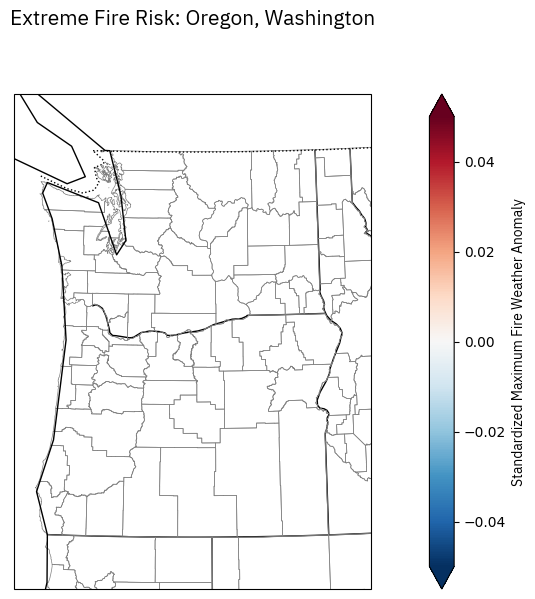

In [40]:
ERA5 = xr.open_mfdataset('../../data/UNSEEN/wildfire/cems/ERA5/ERA5_????.nc', combine='by_coords')

ERA5_fwinx_max_yearly = ERA5.resample(time='1YS').max()


ERA5_anomaly = ERA5_fwinx_max_yearly['fwinx'] - ERA5_fwinx_max_yearly['fwinx'].sel(time=slice('1984-01-01', '2019-12-31')).mean('time')
ERA5_sd_anomaly = ERA5_anomaly / ERA5_fwinx_max_yearly['fwinx'].sel(time=slice('1984-01-01', '2019-12-31')).std('time')

last_3_years = ERA5_sd_anomaly.sel(time=slice('2020-02-01', '2020-12-31')).mean('time')
anomaly_map = plot_n_america_counties(last_3_years)
# plt.savefig('../../figures/UNSEEN_wildfire/map_max_fwi_anomaly.png', dpi=300)


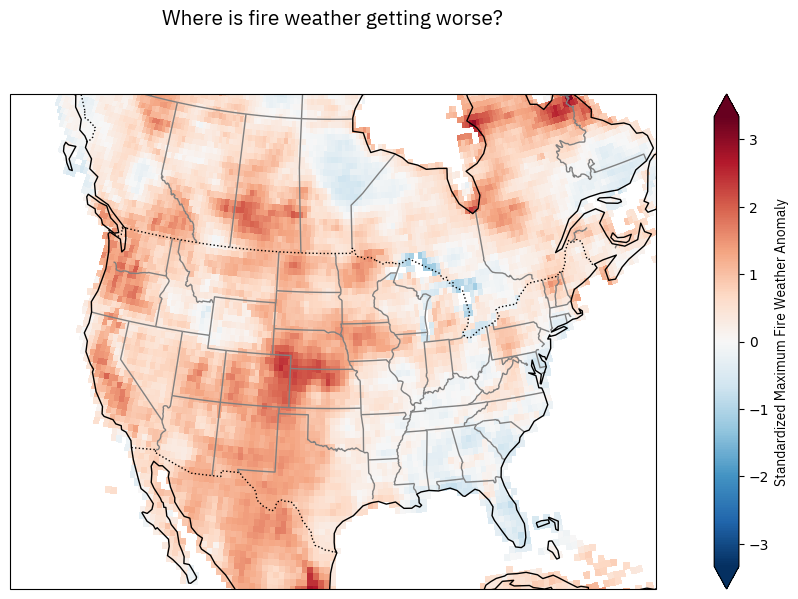

In [8]:
ERA5 = xr.open_mfdataset('../../data/UNSEEN/wildfire/cems/ERA5/ERA5_????.nc', combine='by_coords')

ERA5_fwinx_mean_yearly = ERA5.resample(time='1YS').mean()


ERA5_anomaly = ERA5_fwinx_mean_yearly['fwinx'] - ERA5_fwinx_mean_yearly['fwinx'].sel(time=slice('1973-01-01', '2019-12-31')).mean('time')
ERA5_sd_anomaly = ERA5_anomaly / ERA5_fwinx_mean_yearly['fwinx'].sel(time=slice('1973-01-01', '2019-12-31')).std('time')

last_3_years = ERA5_sd_anomaly.sel(time=slice('2020-01-01', '2023-12-31')).mean('time')
anomaly_map = plot_n_america(last_3_years)
plt.savefig('../../figures/UNSEEN_wildfire/map_mean_fwi_anomaly.png', dpi=300)


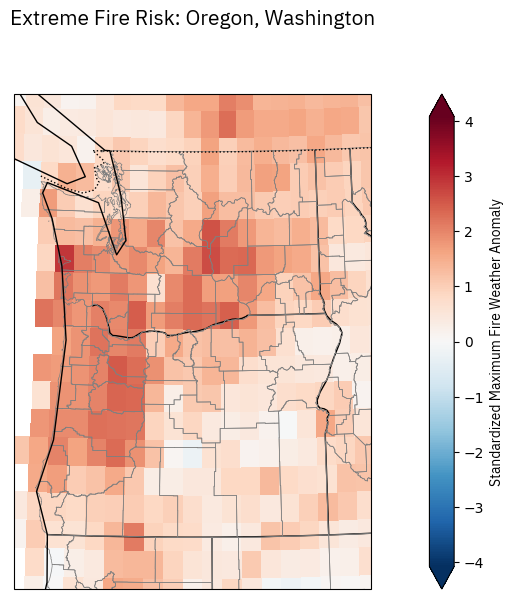

In [30]:
## CO, KS, NE 
# 
# ERA5 = xr.open_mfdataset('../../data/UNSEEN/wildfire/cems/ERA5/ERA5_????.nc', combine='by_coords')

from cartopy.io.shapereader import Reader

ERA5_fwinx_max_yearly = ERA5.resample(time='1YS').max()


ERA5_anomaly = ERA5_fwinx_max_yearly['fwinx'] - ERA5_fwinx_max_yearly['fwinx'].sel(time=slice('1973-01-01', '2019-12-31')).mean('time')
ERA5_sd_anomaly = ERA5_anomaly / ERA5_fwinx_max_yearly['fwinx'].sel(time=slice('1973-01-01', '2019-12-31')).std('time')

last_3_years = ERA5_sd_anomaly.sel(time=slice('2020-01-01', '2023-12-31')).mean('time')
anomaly_map = plot_n_america(last_3_years)
plt.savefig('../../figures/UNSEEN_wildfire/map_max_fwi_anomaly_or_wa.png', dpi=300)

In [116]:
import geopandas as gpd
from shapely.geometry import Point

# Convert the xarray DataArray to a pandas DataFrame
df = last_3_years.to_dataframe().reset_index()
df = df[['latitude', 'longitude', 'fwinx']]
df = df.dropna(subset=['fwinx'])

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
df = df.drop(['longitude', 'latitude'], axis=1)
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Convert the GeoDataFrame to GeoJSON
geojson = gdf.to_json()

with open('../../data/UNSEEN/wildfire/cems/preprocessed/map.geojson', 'w') as f:
    f.write(geojson)

In [59]:
ERA5 = xr.open_mfdataset('../../data/UNSEEN/wildfire/cems/ERA5/ERA5_????.nc', combine='by_coords')
ERA5_anomaly = ERA5['fwinx'] - ERA5['fwinx'].sel(time=slice('1973-01-01', '2017-12-31')).mean('time')
ERA5_sd_anomaly = ERA5_anomaly / ERA5['fwinx'].sel(time=slice('1973-01-01', '2017-12-31')).std('time')

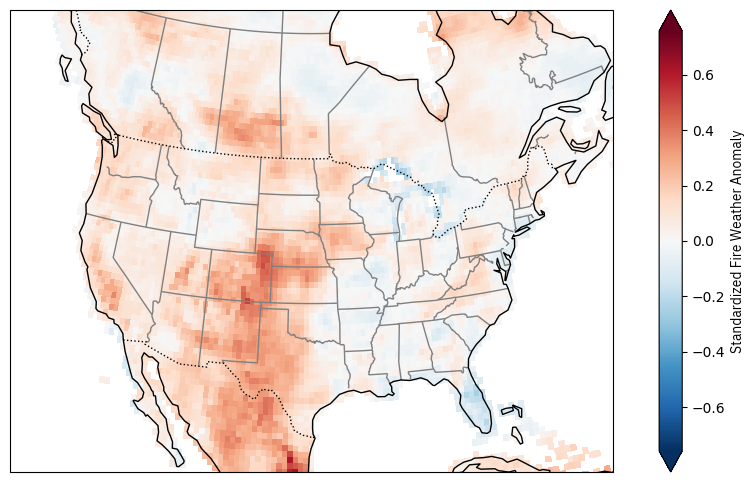

In [61]:
point_in_time = ERA5_sd_anomaly.sel(time=slice('2018-01-01', '2023-12-31')).mean('time')
anomaly_map = plot_n_america(point_in_time)


In [50]:
plt.savefig('../../figures/UNSEEN_wildfire/image001.png')


ValueError: not enough values to unpack (expected 2, got 1)

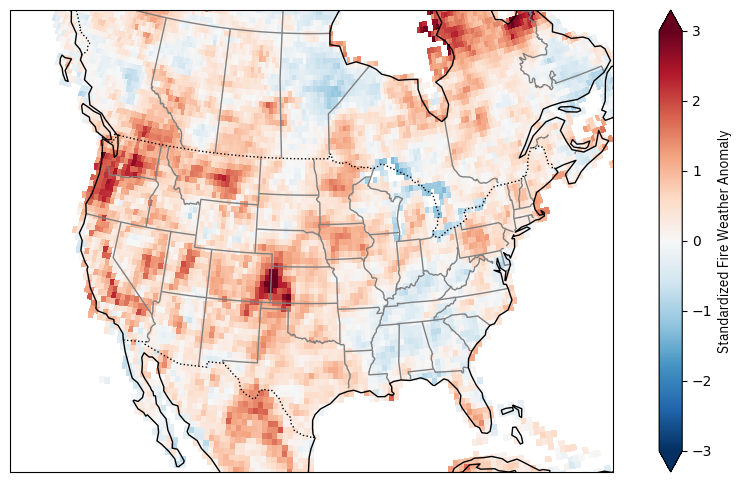